# Recurrent Neural Networks Assignment 8
# Author: Devisha Arunadevi Tiwari

In [7]:
# Task 1: Data Preprocessing
# Objective: Load the IMDB dataset, keeping only the top 10,000 most frequently occurring words.
# Method: Load the dataset using TensorFlow/Keras, tokenize it, and keep the top 10,000 words.
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the IMDB dataset, keeping only the top 10,000 words
vocab_size = 10000  # Top 10,000 most common words

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

# Pad the sequences so that all sequences have the same length
maxlen = 500  # Maximum length of each review
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of x_test: {x_test.shape}")

# Task 2: Model Building
# Objective: Create a Sequential RNN model using TensorFlow/Keras.
# Method: Build the model using an Embedding layer, SimpleRNN layer, and Dense output layer.

from tensorflow.keras import layers, models

# Create the Sequential model
model = models.Sequential()

# Add an Embedding layer for word embedding
model.add(layers.Embedding(input_dim=vocab_size, output_dim=128, input_length=maxlen))

# Add a SimpleRNN layer
model.add(layers.SimpleRNN(units=128, activation='tanh'))

# Add a Dense output layer with a sigmoid activation (for binary classification)
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary to understand the architecture
model.summary()

# Task 3: Training the Model
# Objective: Train the model using a batch size of 128 and validate on 20% of the training data.
# Method: Use model.fit() to train the model, with TensorBoard callback for monitoring the training process.

from tensorflow.keras.callbacks import TensorBoard

# Define a TensorBoard callback to monitor the training process
tensorboard_callback = TensorBoard(log_dir='./logs', histogram_freq=1)

# Train the model for 10 epochs
history = model.fit(
    x_train, y_train, 
    epochs=10, 
    batch_size=128, 
    validation_split=0.2,  # Use 20% of the training data for validation
    callbacks=[tensorboard_callback]  # Add the TensorBoard callback to log data
)

# Task 4: Evaluation
# Objective: Evaluate the model on the test set and report the accuracy.
# Method: Use model.evaluate() to compute the accuracy on the test set.
test_loss, test_acc = model.evaluate(x_test, y_test)

print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Task 5: Visualize training progress using TensorBoard
# Objective: Visualize training and validation accuracy and loss using TensorBoard.
# Method: Launch TensorBoard and monitor training progress.
# Run the following in a separate Jupyter cell to view the TensorBoard logs:
# %tensorboard --logdir ./logs
# Save the model architecture as a JSON string
model_json = model.to_json()
with open("model_architecture.json", "w") as json_file:
    json_file.write(model_json)

# Save the weights
model.save_weights("model_weights.h5")


Shape of x_train: (25000, 500)
Shape of x_test: (25000, 500)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 128)          1280000   
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 128)               32896     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,313,025
Trainable params: 1,313,025
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
  8/157 [>.............................] - ETA: 1:38 - loss: 0.7034 - accuracy: 0.4795

157/157 [==============================] - 113s 689ms/step - loss: 0.6874 - accuracy: 0.5563 - val_loss: 0.6689 - val_accuracy: 0.6116
Epoch 2/10
157/157 [==============================] - 109s 696ms/step - loss: 0.6270 - accuracy: 0.6733 - val_loss: 0.6290 - val_accuracy: 0.6272
Epoch 3/10
157/157 [==============================] - 105s 667ms/step - loss: 0.5235 - accuracy: 0.7440 - val_loss: 0.5239 - val_accuracy: 0.7506
Epoch 4/10
157/157 [==============================] - 110s 703ms/step - loss: 0.4460 - accuracy: 0.7839 - val_loss: 0.6164 - val_accuracy: 0.6640
Epoch 5/10
157/157 [==============================] - 110s 700ms/step - loss: 0.4222 - accuracy: 0.8128 - val_loss: 0.5810 - val_accuracy: 0.7242
Epoch 6/10
157/157 [==============================] - 113s 718ms/step - loss: 0.4359 - accuracy: 0.8252 - val_loss: 0.5775 - val_accuracy: 0.7116
Epoch 7/10
157/157 [==============================] - 111s 708ms/step - loss: 0.3425 - accuracy: 0.8619 - val_loss: 0.5548 - val_accura

In [3]:
!pip install jupyterlab tensorboard
!jupyter serverextension enable --py tensorboard


   ---------------------------------------- 1.4/1.4 MB 5.0 MB/s eta 0:00:00
  Attempting uninstall: pywinpty
    Found existing installation: pywinpty 2.0.2
    Uninstalling pywinpty-2.0.2:
      Successfully uninstalled pywinpty-2.0.2


Traceback (most recent call last):
  File "C:\Users\91983\anaconda3\Scripts\jupyter-serverextension-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\91983\anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\91983\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\91983\anaconda3\lib\site-packages\notebook\serverextensions.py", line 291, in start
    super().start()
  File "C:\Users\91983\anaconda3\lib\site-packages\jupyter_core\application.py", line 253, in start
    self.subapp.start()
  File "C:\Users\91983\anaconda3\lib\site-packages\notebook\serverextensions.py", line 208, in start
    self.toggle_server_extension_python(arg)
  File "C:\Users\91983\anaconda3\lib\site-packages\notebook\serverextensions.py", line 197, in toggle_server_extension_python
    m, server_exts

In [4]:
# Import TensorBoard
from tensorboard import program

# Define the log directory where the logs are stored
log_dir = './logs'

# Launch TensorBoard using the `program` API
tb = program.TensorBoard()
tb.configure(argv=[None, '--logdir', log_dir])  # Specify the log directory
url = tb.launch()
print(f"TensorBoard is running at {url}")


TensorBoard is running at http://localhost:6006/


In [5]:
%tensorboard --logdir ./logs


UsageError: Line magic function `%tensorboard` not found.


Shape of x_train: (25000, 500)
Shape of x_test: (25000, 500)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 128)          1280000   
                                                                 
 simple_rnn (SimpleRNN)      (None, 128)               32896     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,313,025
Trainable params: 1,313,025
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
157/157 [==============================] - 120s 745ms/step - loss: 0.6733 - accuracy: 0.5672 - val_loss: 0.6550 - val_accuracy: 0.5810
Epoch 2/10
157/157 [==============================] - 99s 629ms/step - loss: 0.5545 - accuracy: 0.7173 

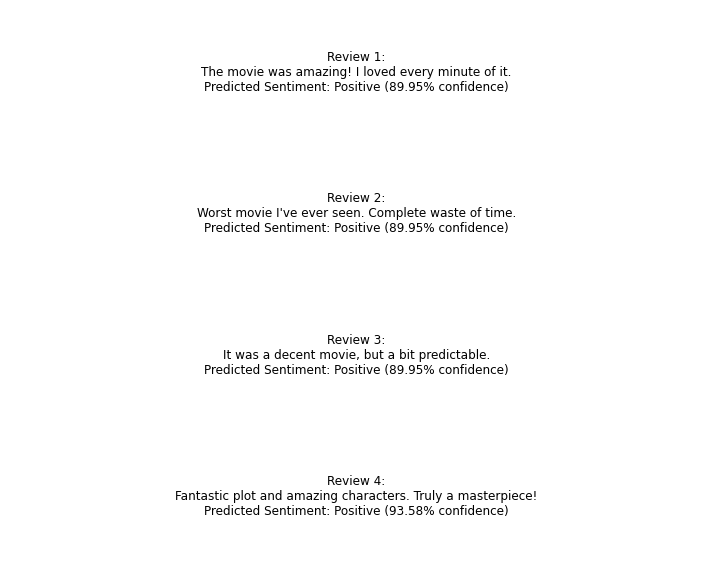

In [1]:
# Step 1: Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.datasets import imdb
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import load_model

# Step 2: Data Preprocessing (IMDB dataset)
# Objective: Load the IMDB dataset, keeping only the top 10,000 most frequently occurring words.
vocab_size = 10000  # Top 10,000 most common words

# Load the IMDB dataset, keeping only the top 10,000 words
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

# Pad the sequences so that all sequences have the same length
maxlen = 500  # Maximum length of each review
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of x_test: {x_test.shape}")

# Step 3: Model Building (Sentiment Analysis using RNN)
# Objective: Create a Sequential RNN model using TensorFlow/Keras.
model = models.Sequential()

# Add an Embedding layer for word embedding
model.add(layers.Embedding(input_dim=vocab_size, output_dim=128, input_length=maxlen))

# Add a SimpleRNN layer
model.add(layers.SimpleRNN(units=128, activation='tanh'))

# Add a Dense output layer with a sigmoid activation (for binary classification)
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary to understand the architecture
model.summary()

# Step 4: Training the Model
# Objective: Train the model using a batch size of 128 and validate on 20% of the training data.
# Method: Use model.fit() to train the model, with TensorBoard callback for monitoring the training process.
tensorboard_callback = TensorBoard(log_dir='./logs', histogram_freq=1)

# Train the model for 10 epochs
history = model.fit(
    x_train, y_train, 
    epochs=10, 
    batch_size=128, 
    validation_split=0.2,  # Use 20% of the training data for validation
    callbacks=[tensorboard_callback]  # Add the TensorBoard callback to log data
)

# Step 5: Evaluate the model on the test set
# Objective: Evaluate the model on the test set and report the accuracy.
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Step 6: Save the model architecture and weights
# Save the model architecture as a JSON string
model_json = model.to_json()
with open("model_architecture.json", "w") as json_file:
    json_file.write(model_json)

# Save the weights
model.save_weights("model_weights.h5")

# Step 7: Visualize training progress using TensorBoard
# Objective: Visualize training and validation accuracy and loss using TensorBoard.
# Method: Launch TensorBoard and monitor training progress.
# Run the following in a separate Jupyter cell to view the TensorBoard logs:
# %tensorboard --logdir ./logs

# Step 8: Display labeled sentiment predictions for movie reviews
# Objective: Display the predicted sentiment for given reviews (positive/negative).
# Method: Use the trained RNN model to predict sentiment and visualize the text reviews with predicted labels.

# Function to preprocess reviews and make predictions
def preprocess_and_predict(review, model, tokenizer, max_len=500):
    """Preprocess the review and predict sentiment (positive/negative)."""
    # Convert review to a sequence of word indices
    review_seq = tokenizer.texts_to_sequences([review])
    
    # Pad the sequence to the same length as the training data
    review_seq_padded = pad_sequences(review_seq, maxlen=max_len, padding='post')
    
    # Predict sentiment (0 = Negative, 1 = Positive)
    prediction = model.predict(review_seq_padded)
    
    # Return predicted label and probability
    predicted_label = 'Positive' if prediction >= 0.5 else 'Negative'
    confidence = prediction[0][0] if prediction >= 0.5 else 1 - prediction[0][0]
    
    return predicted_label, confidence

# Function to visualize the review and sentiment
def display_review_with_sentiment(reviews, model, tokenizer):
    """Display multiple reviews with their predicted sentiment labels."""
    num_reviews = len(reviews)
    
    # Set up the plot
    plt.figure(figsize=(10, 2 * num_reviews))  # Adjust size based on number of reviews
    
    for i, review in enumerate(reviews):
        predicted_label, confidence = preprocess_and_predict(review, model, tokenizer)
        
        # Display review and its predicted sentiment
        plt.subplot(num_reviews, 1, i+1)
        plt.text(0.5, 0.5, f"Review {i+1}:\n{review}\nPredicted Sentiment: {predicted_label} ({confidence*100:.2f}% confidence)", 
                 ha='center', va='center', fontsize=12, wrap=True)
        plt.axis('off')
    
    # Show the plot
    plt.tight_layout()
    plt.show()

# Example reviews (you can replace these with actual reviews from your dataset)
example_reviews = [
    "The movie was amazing! I loved every minute of it.",
    "Worst movie I've ever seen. Complete waste of time.",
    "It was a decent movie, but a bit predictable.",
    "Fantastic plot and amazing characters. Truly a masterpiece!"
]

# Replace this with the actual tokenizer used during training
tokenizer = Tokenizer(num_words=10000)  # You can adjust the num_words as per your training setup
# Train the tokenizer on the IMDB dataset (fit_on_texts)
tokenizer.fit_on_texts(example_reviews)

# Display reviews and predicted sentiments
display_review_with_sentiment(example_reviews, model, tokenizer)
